In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
travelPony = 'drive/My Drive/Colab Notebooks/Travel Pony Facebook.csv'
df = pd.read_csv(travelPony)
df.head()

,Start Date,End Date,Account,Campaign Name,Reach,Frequency,Impressions,Clicks,Unique Clicks,Amount Spent (USD),Page Likes,Page Engagement,Post Engagement,Post Likes,Post Comments,Post Shares,Photo Views,Website Clicks,Cost per Page Like (USD),Cost per Page Engagement (USD)
0,2013-12-02,2013-12-02,Bob Jackson,Cyber Weekend,278117,2.314303,643647,336,313,300.00,3,246,243,0,0,0,0,243,100.00,1.219512
1,2013-12-01,2013-12-01,Bob Jackson,Cyber Weekend,221255,2.079090,460009,376,348,300.00,6,215,209,0,0,0,0,209,50.00,1.395349
2,2013-11-30,2013-11-30,Bob Jackson,Cyber Weekend,267915,2.499069,669538,383,345,300.00,2,252,250,0,0,0,0,250,150.00,1.190476
3,2013-11-29,2013-11-29,Bob Jackson,Cyber Weekend,280332,2.365406,663099,301,275,300.00,3,257,254,0,0,0,0,254,100.00,1.167315
4,2013-11-22,2013-11-22,Bob Jackson,TravelPony: General Ads,14269,1.000420,14275,64,61,35.18,2,14,12,0,0,0,0,12,17.59,2.512857


In [0]:
df = df.rename(columns={'Amount Spent (USD)': 'amountSpent'})
df = df[df.amountSpent != 0]
df.head()

,Start Date,End Date,Account,Campaign Name,Reach,Frequency,Impressions,Clicks,Unique Clicks,amountSpent,Page Likes,Page Engagement,Post Engagement,Post Likes,Post Comments,Post Shares,Photo Views,Website Clicks,Cost per Page Like (USD),Cost per Page Engagement (USD)
0,2013-12-02,2013-12-02,Bob Jackson,Cyber Weekend,278117,2.314303,643647,336,313,300.00,3,246,243,0,0,0,0,243,100.00,1.219512
1,2013-12-01,2013-12-01,Bob Jackson,Cyber Weekend,221255,2.079090,460009,376,348,300.00,6,215,209,0,0,0,0,209,50.00,1.395349
2,2013-11-30,2013-11-30,Bob Jackson,Cyber Weekend,267915,2.499069,669538,383,345,300.00,2,252,250,0,0,0,0,250,150.00,1.190476
3,2013-11-29,2013-11-29,Bob Jackson,Cyber Weekend,280332,2.365406,663099,301,275,300.00,3,257,254,0,0,0,0,254,100.00,1.167315
4,2013-11-22,2013-11-22,Bob Jackson,TravelPony: General Ads,14269,1.000420,14275,64,61,35.18,2,14,12,0,0,0,0,12,17.59,2.512857


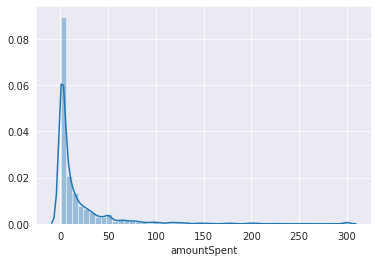

In [0]:
sns.set_style('darkgrid')
sns.distplot(df['amountSpent'])


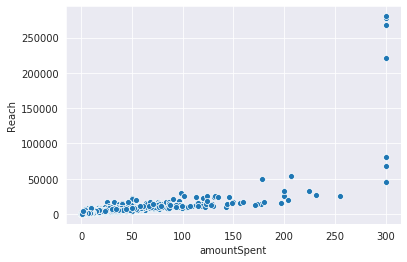

In [0]:
sns.scatterplot(x='amountSpent', y='Reach', data=df)

Somewhat linear

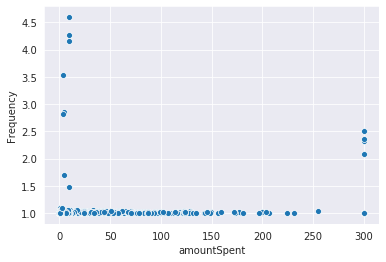

In [0]:
sns.scatterplot(x='amountSpent', y='Frequency', data=df)

Non-linear

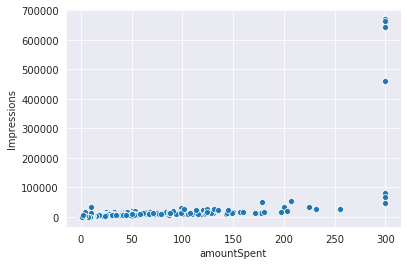

In [0]:
sns.scatterplot(x='amountSpent', y='Impressions', data=df)

Non-Linear

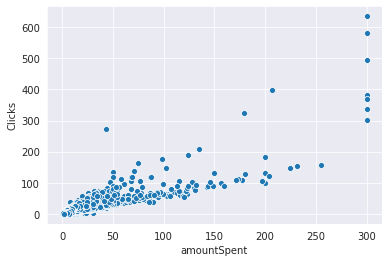

In [0]:
sns.scatterplot(x='amountSpent', y='Clicks', data=df)

Linear - linear model will likely work for this variable

In [0]:
df['Campaign Name'].unique()

array(['Cyber Weekend', 'TravelPony: General Ads',
       'TravelPony: Conversion Test',
       'Post: "You need to get some real sun and we are here to..."',
       'Nanigans_7_720', 'Nanigans_7_723', 'Nanigans_7_721',
       'Nanigans_7_719', 'Nanigans_7_724', 'Nanigans_7_722',
       'Nanigans_6_713', 'Nanigans_5_701', 'Nanigans_5_712',
       'Nanigans_5_708', 'Nanigans_5_711', 'Nanigans_6_717',
       'Nanigans_5_703', 'Nanigans_5_706', 'Nanigans_5_705',
       'Nanigans_5_709', 'Nanigans_5_704', 'Nanigans_5_707',
       'Nanigans_6_716', 'Nanigans_5_702', 'Nanigans_5_710',
       'Nanigans_6_718', 'Nanigans_6_715',
       'Simple_Multi_Fill_Campaign_2_627', 'Nanigans_2_662',
       'Nanigans_2_664', 'Nanigans_2_654', 'Nanigans_2_660',
       'Nanigans_2_651', 'Nanigans_2_655', 'Nanigans_2_653',
       'Simple_Multi_Fill_Campaign_1_336', 'Nanigans_2_663',
       'Nanigans_2_640', 'Nanigans_2_656',
       'Simple_Multi_Fill_Campaign_2_631', 'Nanigans_2_652',
       'Nanigans_2_647'

In [0]:
df['Campaign Name'] = df['Campaign Name'].astype('str')
df['Campaign Name'] = df['Campaign Name'].str.replace('[^a-zA-Z0-9:\s+]', '')
df['Campaign Name'] = df['Campaign Name'].str.replace('\d+', '')
df = pd.concat((df, pd.get_dummies(df['Campaign Name'])), axis=1)

df.head()

,Start Date,End Date,Account,Campaign Name,Reach,Frequency,Impressions,Clicks,Unique Clicks,amountSpent,Page Likes,Page Engagement,Post Engagement,Post Likes,Post Comments,Post Shares,Photo Views,Website Clicks,Cost per Page Like (USD),Cost per Page Engagement (USD),Ad,Cyber Weekend,Nanigans,Post: You need to get some real sun and we are here to,SimpleMultiFillCampaign,TravelPony: Conversion Test,TravelPony: General Ads,TravelponyPage LikesUS,http:travelponyClicksUS
0,2013-12-02,2013-12-02,Bob Jackson,Cyber Weekend,278117,2.314303,643647,336,313,300.00,3,246,243,0,0,0,0,243,100.00,1.219512,0,1,0,0,0,0,0,0,0
1,2013-12-01,2013-12-01,Bob Jackson,Cyber Weekend,221255,2.079090,460009,376,348,300.00,6,215,209,0,0,0,0,209,50.00,1.395349,0,1,0,0,0,0,0,0,0
2,2013-11-30,2013-11-30,Bob Jackson,Cyber Weekend,267915,2.499069,669538,383,345,300.00,2,252,250,0,0,0,0,250,150.00,1.190476,0,1,0,0,0,0,0,0,0
3,2013-11-29,2013-11-29,Bob Jackson,Cyber Weekend,280332,2.365406,663099,301,275,300.00,3,257,254,0,0,0,0,254,100.00,1.167315,0,1,0,0,0,0,0,0,0
4,2013-11-22,2013-11-22,Bob Jackson,TravelPony: General Ads,14269,1.000420,14275,64,61,35.18,2,14,12,0,0,0,0,12,17.59,2.512857,0,0,0,0,0,0,1,0,0


In [0]:
df.columns = ['Start Date', 'End Date', 'Account', 'Campaign Name', 'Reach',
       'Frequency', 'Impressions', 'Clicks', 'Unique Clicks',
       'amountSpent', 'Page Likes', 'Page Engagement',
       'Post Engagement', 'Post Likes', 'Post Comments', 'Post Shares',
       'Photo Views', 'Website Clicks', 'Cost per Page Like (USD)',
       'Cost per Page Engagement (USD)', 'Ad', 'Cyber Weekend', 'Nanigans',
       'Post',
       'SimpleMultiFillCampaign', 'Conversion Test',
       'General Ads', 'TravelponyPageLikes',
       'Travelpony Clicks']

In [0]:
target = df['amountSpent']
indep = df[['Cyber Weekend', 'Ad', 'Nanigans' , 'Post', 'SimpleMultiFillCampaign', 'Conversion Test', 'General Ads', 'TravelponyPageLikes', 'Travelpony Clicks' ,'Reach','Frequency','Impressions','Clicks','Unique Clicks','Page Likes','Page Engagement','Post Engagement','Post Likes','Post Comments','Post Shares','Photo Views','Website Clicks']]

mod = sm.OLS(target, indep).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            amountSpent   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     1282.
Date:                Thu, 21 Nov 2019   Prob (F-statistic):               0.00
Time:                        05:25:11   Log-Likelihood:                -6484.6
No. Observations:                1802   AIC:                         1.301e+04
Df Residuals:                    1781   BIC:                         1.313e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Cyber Weekend            -210.0978     26.172     -8.028      0.000    -261.429    -158.766
Ad                         -8.7199      4.648     -1.876      0.061     -17.836       0.396
Nanigans                  -11.1471      3.438     -3.242      0.001     -17.891      -4.403
Post                      -25.4838      7.772     -3.279      0.001     -40.726     -10.241
SimpleMultiFillCampaign    -8.8824      3.374     -2.632      0.009     -15.500      -2.265
Conversion Test            45.4009      5.816      7.806      0.000      33.993      56.808
General Ads               -34.0630      6.690     -5.091      0.000     -47.185     -20.941
TravelponyPageLikes       -15.2335      5.554     -2.743      0.006     -26.127      -4.340
Travelpony Clicks         -26.2998     11.525     -2.282      0.023     -48.904      -3.695
Reach                       0.0031      0.000     20.623      0.000       0.003       0.003
Frequency                   8.0177      3.337      2.403      0.016       1.474      14.562
Impressions                -0.0008   8.08e-05     -9.964      0.000      -0.001      -0.001
Clicks                     -0.3369      0.110     -3.073      0.002      -0.552      -0.122
Unique Clicks               0.5557      0.122      4.569      0.000       0.317       0.794
Page Likes                 23.2839      8.919      2.611      0.009       5.791      40.777
Page Engagement           -20.1012      8.916     -2.255      0.024     -37.588      -2.615
Post Engagement            17.1443      7.431      2.307      0.021       2.571      31.718
Post Likes                  2.3301      1.491      1.563      0.118      -0.594       5.254
Post Comments               3.5094      1.551      2.263      0.024       0.468       6.551
Post Shares                 4.8389      1.513      3.198      0.001       1.871       7.807
Photo Views                 3.1375      1.489      2.107      0.035       0.217       6.058
Website Clicks              3.3284      1.489      2.235      0.026       0.408       6.249
==============================================================================
Omnibus:                      734.641   Durbin-Watson:                   1.690
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20578.497
Skew:                           1.310   Prob(JB):                         0.00
Kurtosis:                      19.347   Cond. No.                     3.41e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.66e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Highest Predictors:
1. Conversion Test
2. Page Likes
3. Post Engagement
 
